## **CROP AND FERTILIZER RECOMMENDATION SYSTEM USING ML**

In [2]:
# importing necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# loading the datasets.

crop = pd.read_csv("datasets/Crop_recommendation.csv")

In [4]:
# First 5 rows of the dataset.

print(crop.head())

# Output: Displays the first 5 rows with column names and values.

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [5]:
# Last 5 rows of the dataset.

print(crop.tail())

# Output: Displays the last 5 rows.

        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [6]:
# Returns the shape (rows, columns).

crop.shape

(2200, 8)

In [7]:
# Displays information about the dataset.

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
# To check for missing values in the dataset.

crop.isnull()

N      P      K  temperature  humidity     ph  rainfall  label
0     False  False  False        False     False  False     False  False
1     False  False  False        False     False  False     False  False
2     False  False  False        False     False  False     False  False
3     False  False  False        False     False  False     False  False
4     False  False  False        False     False  False     False  False
...     ...    ...    ...          ...       ...    ...       ...    ...
2195  False  False  False        False     False  False     False  False
2196  False  False  False        False     False  False     False  False
2197  False  False  False        False     False  False     False  False
2198  False  False  False        False     False  False     False  False
2199  False  False  False        False     False  False     False  False

[2200 rows x 8 columns]

In [9]:
# Returns the sum of missing values in the dataset.

crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
# Check for duplicated values in the dataset.

crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [11]:
# Return the sum of duplicated values in the dataset.

crop.duplicated().sum()

0

In [12]:
# Check the statistical summary of the dataset.

crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [13]:
# Displays all column names in the dataset.

crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
#  To check target feature distribution .

crop['label'].value_counts()

# it counts how many times each unique value appears in a column.

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Additional measurements

In [15]:
# To check Unique Values (for categorical data).

crop["label"].unique() #we use any column name to check the unique values in the dataset.

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
# to check the data types of each column.

crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [17]:
# To check Minimum value in each column.

crop.min()

N                      0
P                      5
K                      5
temperature     8.825675
humidity        14.25804
ph              3.504752
rainfall       20.211267
label              apple
dtype: object

In [18]:
# To check Maximum values in each column.

crop.max()

N                     140
P                     145
K                     205
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
label          watermelon
dtype: object

In [19]:
# to count number of values.

crop.count()

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [20]:
# to check the mean value.

crop.mean(numeric_only=True) # it avoids non numeric columns.

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

In [21]:
# to check the median value.

crop.median(numeric_only=True) # it avoids non numeric columns.

N              37.000000
P              51.000000
K              32.000000
temperature    25.598693
humidity       80.473146
ph              6.425045
rainfall       94.867624
dtype: float64

In [22]:
# to check the mode value.

crop.mode(numeric_only=True) # it avoids non numeric columns.

N     P     K  temperature   humidity        ph    rainfall
0     22.0  60.0  17.0     8.825675  14.258040  3.504752   20.211267
1     40.0   NaN   NaN     9.467960  14.273280  3.510404   20.360011
2      NaN   NaN   NaN     9.535586  14.280419  3.525366   20.390205
3      NaN   NaN   NaN     9.724458  14.323138  3.532009   20.490356
4      NaN   NaN   NaN     9.851243  14.338474  3.558823   20.661278
...    ...   ...   ...          ...        ...       ...         ...
2195   NaN   NaN   NaN    43.037143  99.658092  9.416003  291.298662
2196   NaN   NaN   NaN    43.080227  99.724010  9.459493  295.609449
2197   NaN   NaN   NaN    43.302049  99.846716  9.679241  295.924880
2198   NaN   NaN   NaN    43.360515  99.969060  9.926212  298.401847
2199   NaN   NaN   NaN    43.675493  99.981876  9.935091  298.560117

[2200 rows x 7 columns]

In [23]:
# to check standard derivation of columns.

crop.std(numeric_only=True) # it avoids non numeric columns.

N              36.917334
P              32.985883
K              50.647931
temperature     5.063749
humidity       22.263812
ph              0.773938
rainfall       54.958389
dtype: float64

In [24]:
# to find specific values at given percentages in your dataset we use quantile() function.
# np.percentile() is also used to get these details.
Q1 = crop['N'].quantile(0.25)
Q2 = crop['N'].quantile(0.50)
Q3 = crop['N'].quantile(0.75)
Q4 = crop['N'].quantile(1.00)
print(f"1st Quartile: {Q1}")
print(f"2nd Quartile (Median): {Q2}")
print(f"3rd Quartile: {Q3}")
print(f"4th Quartile (Max): {Q4}")

1st Quartile: 21.0
2nd Quartile (Median): 37.0
3rd Quartile: 84.25
4th Quartile (Max): 140.0


## **WEEK-2 PROJECT**

In [25]:
#  To updated list of features and to removing 'label' column from dataset.

features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


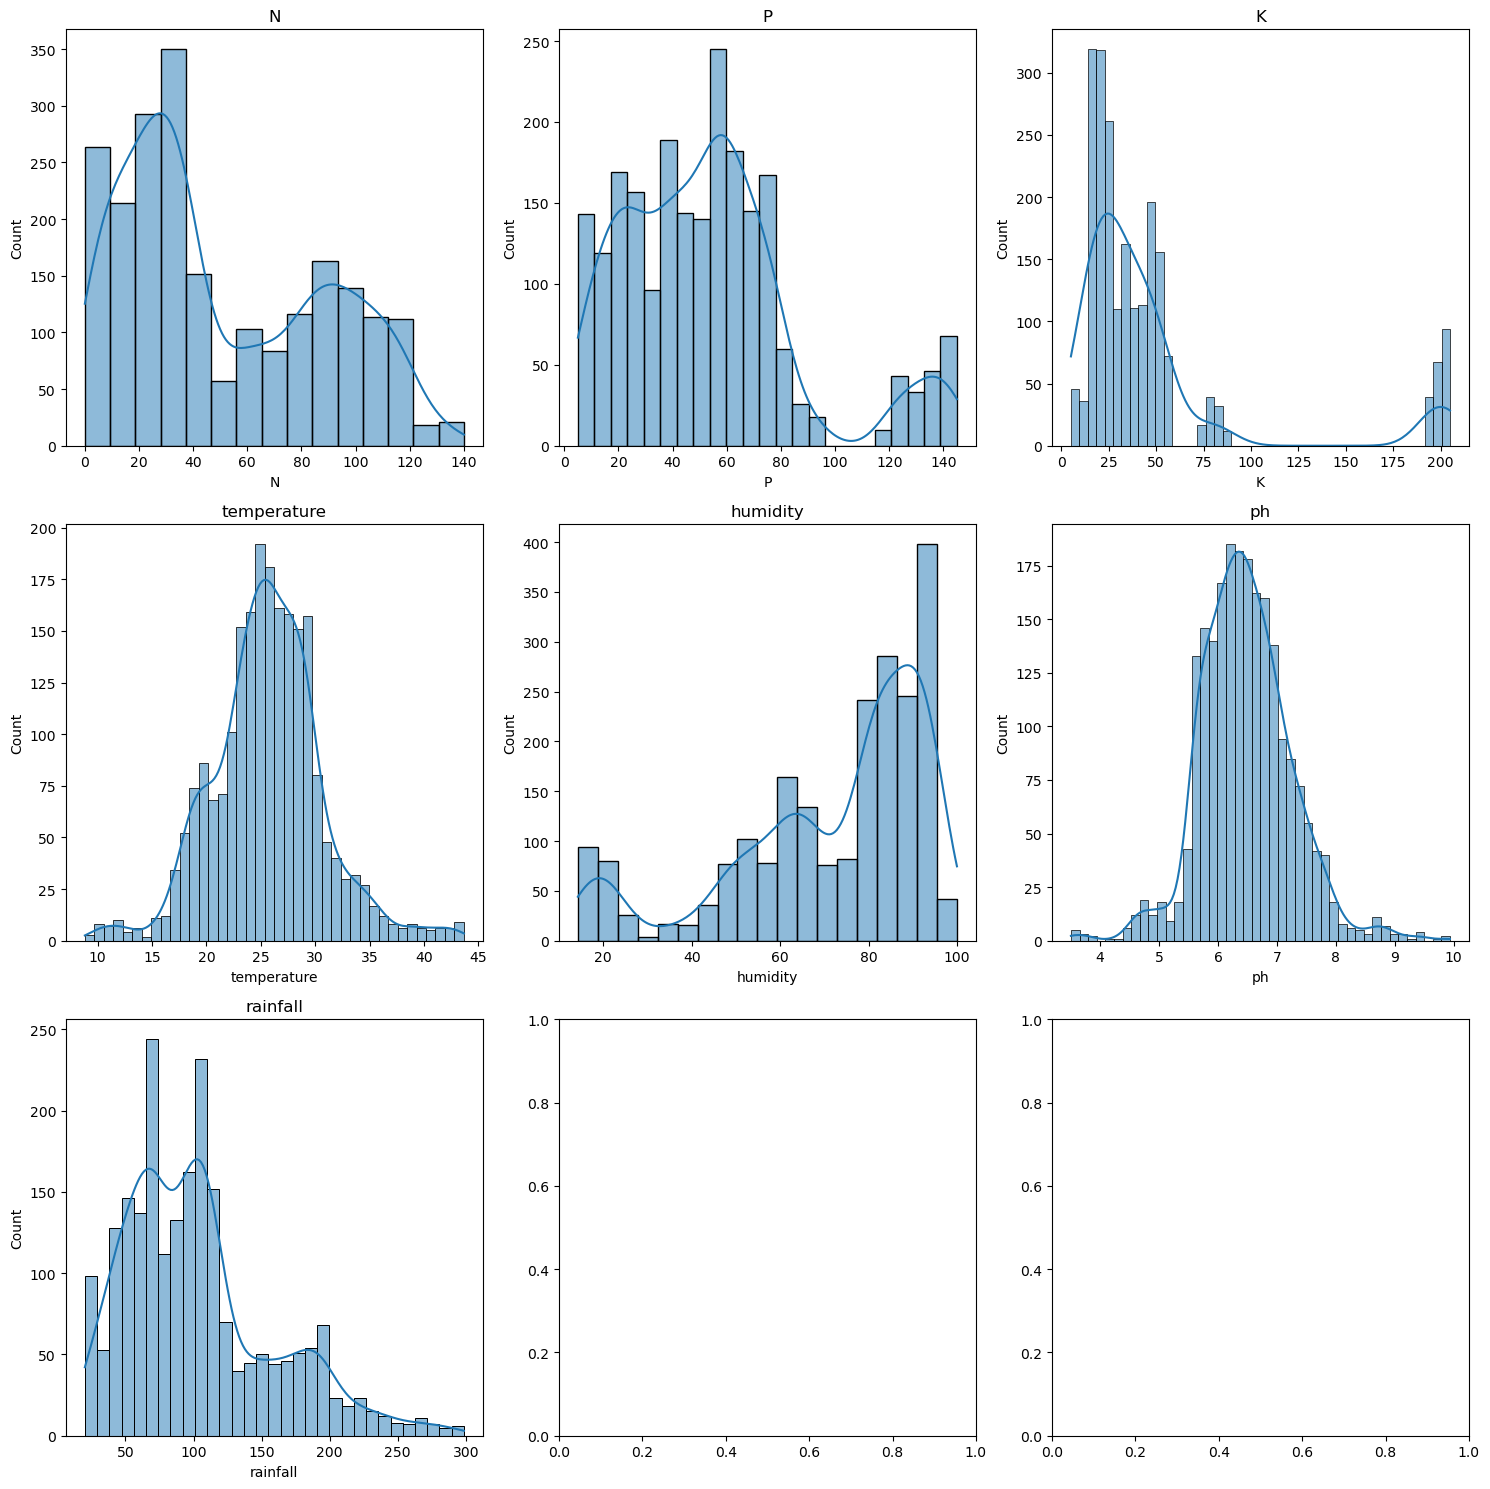

In [26]:
# To Visualize the distribution of each feature.

import seaborn as sns
fig, ax = plt.subplots (3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

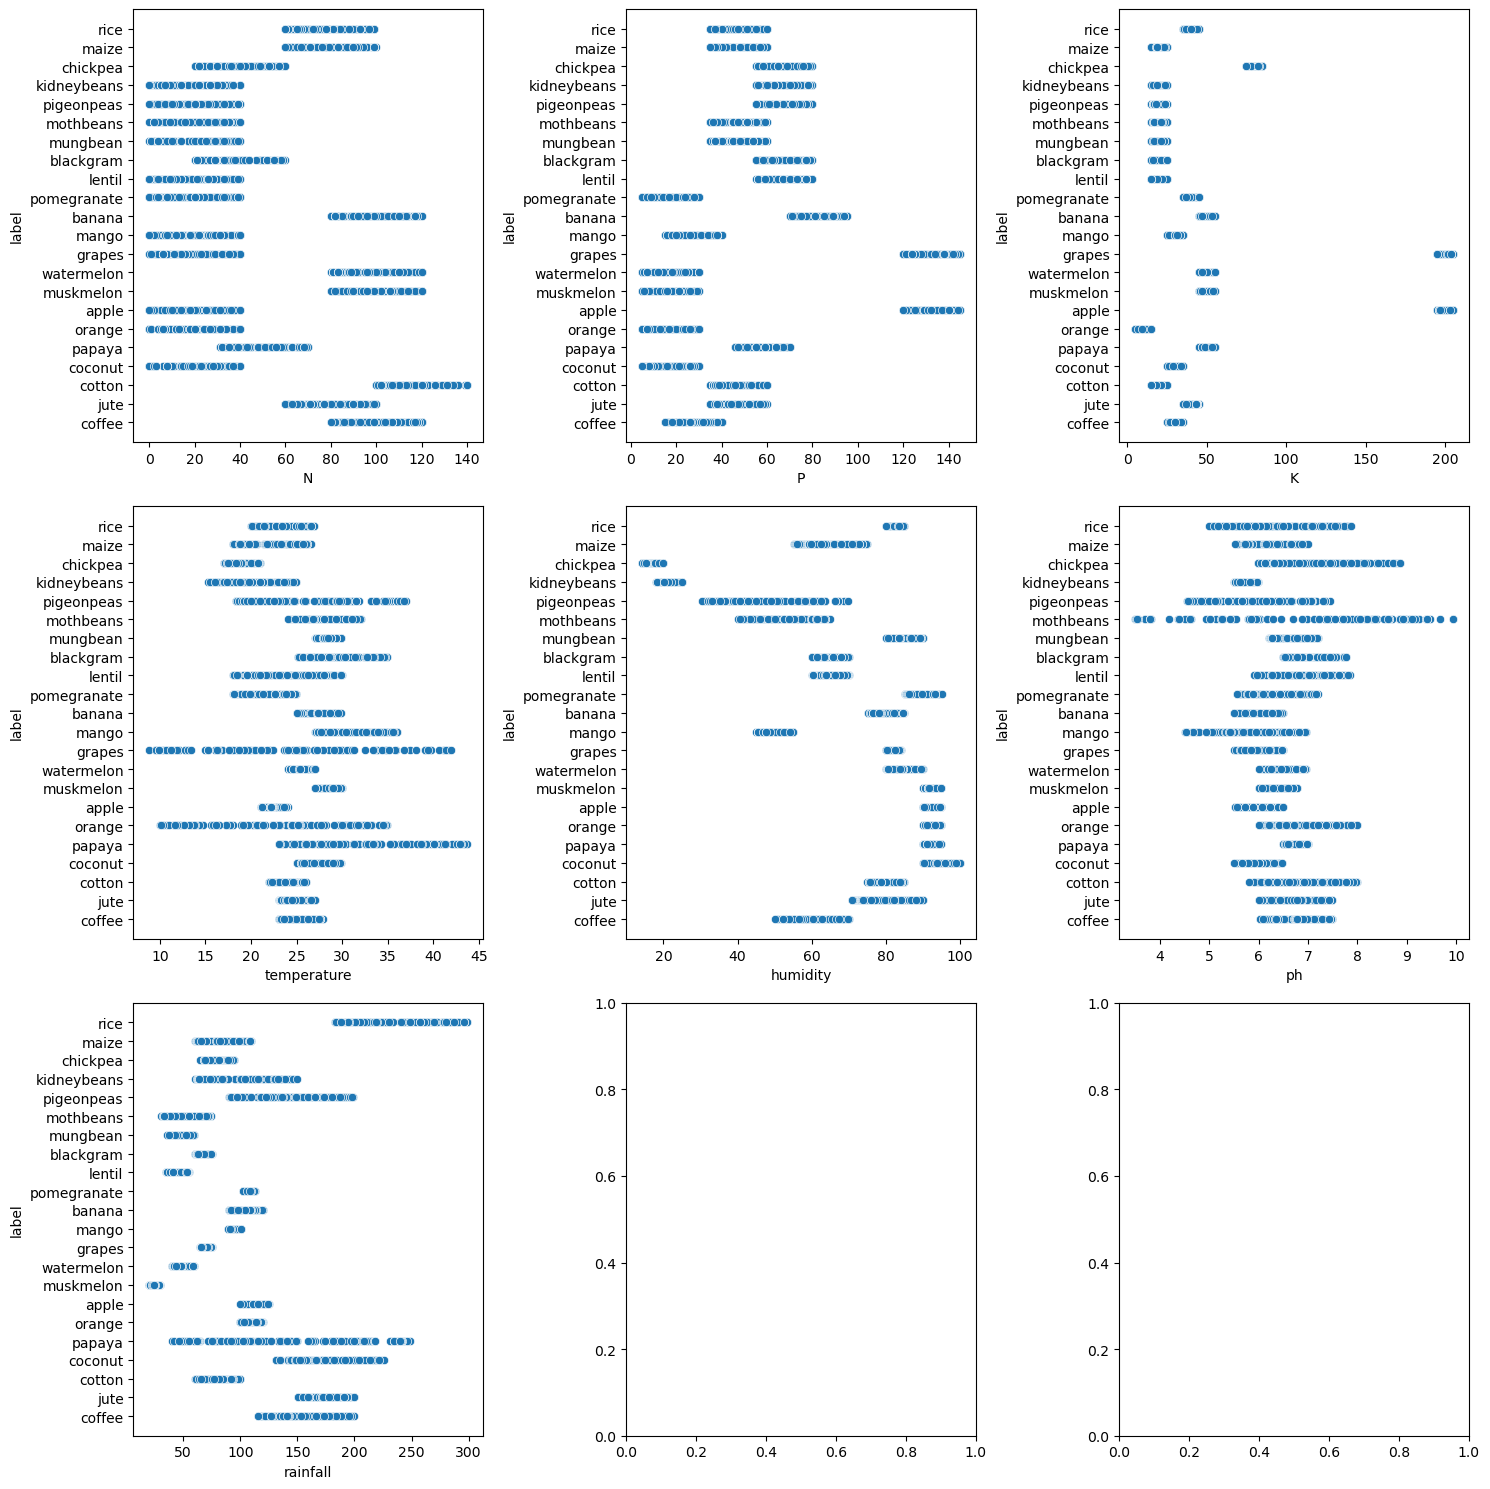

In [27]:
# Plotting scatter plots of each feature against the 'label' column.

import seaborn as sns
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

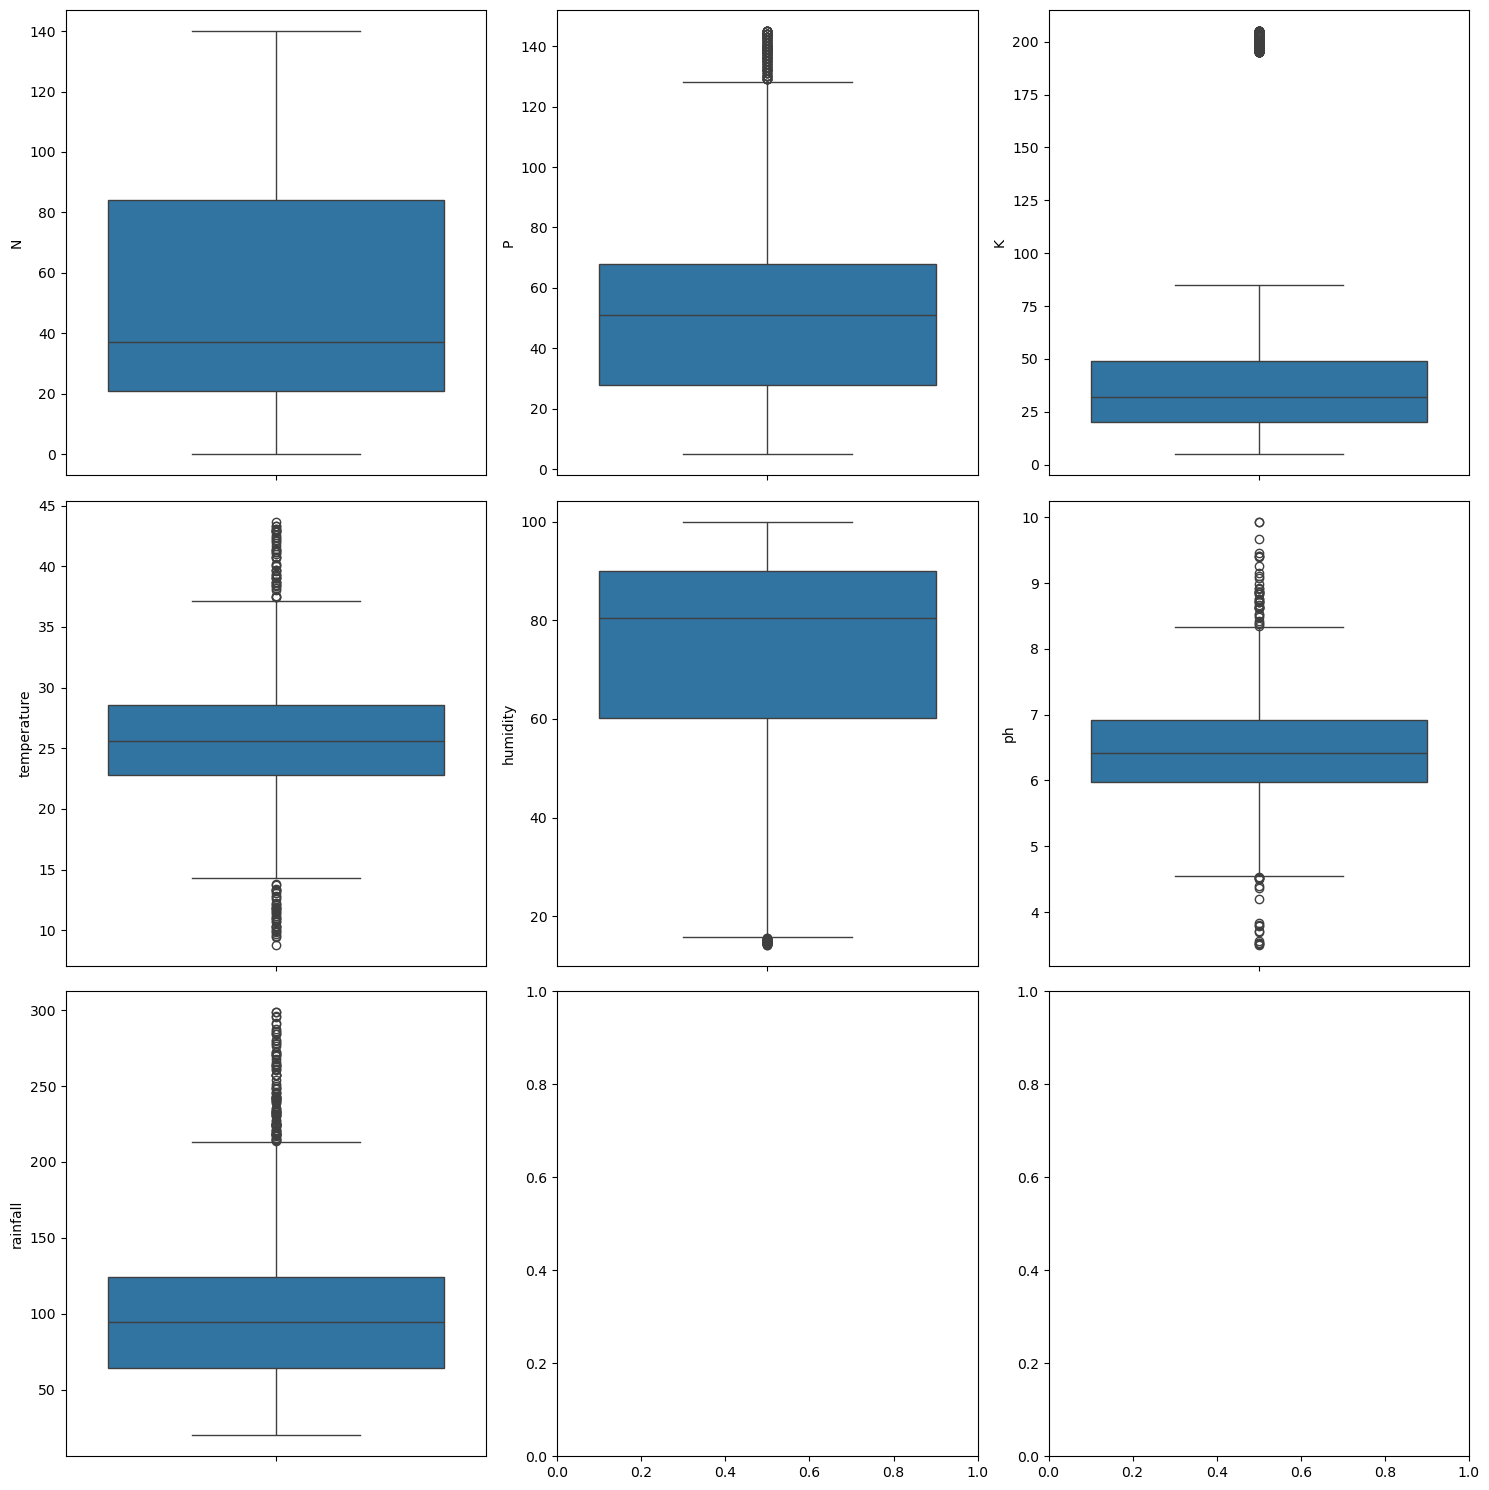

In [28]:
# Creating boxplots to detect outliers for each feature.

fig, ax = plt.subplots(3, 3, figsize=(15, 15))  # Create 3x3 grid for subplots.
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)  # Plot boxplot for each feature.
plt.tight_layout()  # Adjust the layout to avoid overlap.
plt.show() 

In [29]:
# Correlation of the features.

num_cols = crop.select_dtypes (include=[np.number])
num_cols

N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

In [30]:
# Calculating the correlation matrix for numeric features.

corr = num_cols.corr()
corr

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

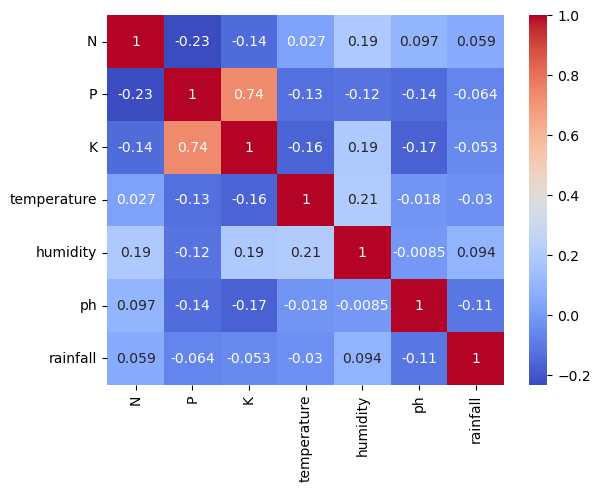

In [31]:
#  Visualizing with heatmap.
# 'annot=True' adds the correlation values inside the heatmap cells for more clarity.
# 'cmap="coolwarm"' uses a color gradient from blue (negative correlation) to red (positive correlation).

sns.heatmap(corr , annot = True , cmap ='coolwarm') 
plt.show() # to display the heatmap plot.

## Encoding

In [32]:
# To get the unique values from the 'label' column in the 'crop' DataFrame.

crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [33]:
# Dictionary mapping crop names to indices (starting from 0).

crop_dict = {
    'rice': 0,
    'maize': 1,
    'chickpea': 2,
    'kidneybeans': 3,
    'pigeonpeas': 4,
    'mothbeans': 5,
    'mungbean': 6,
    'blackgram': 7,
    'lentil': 8,
    'pomegranate': 9,
    'banana': 10,
    'mango': 11,
    'grapes': 12,
    'watermelon': 13,
    'muskmelon': 14,
    'apple': 15,
    'orange': 16,
    'papaya': 17,
    'coconut': 18,
    'cotton': 19,
    'jute': 20,
    'coffee': 21
}

In [34]:
# Mapping the 'label' column values to corresponding crop numbers using the 'crop_dict' dictionary.

crop['crop_no'] = crop['label'].map(crop_dict)

In [35]:
# to check whether those were mapped or not.

crop.head()

N   P   K  temperature   humidity        ph    rainfall label  crop_no
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice        0
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice        0
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        0
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice        0
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        0

In [36]:
# to check whether those were mapped or not.
 
crop.tail()

N   P   K  temperature   humidity        ph    rainfall   label  \
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      crop_no  
2195       21  
2196       21  
2197       21  
2198       21  
2199       21

In [68]:
# removing the label column from the data set.
crop.drop('label' , axis = 1 , inplace = True)


In [38]:
# to check the label column is deleted or not.

crop.tail()

N   P   K  temperature   humidity        ph    rainfall  crop_no
2195  107  34  32    26.774637  66.413269  6.780064  177.774507       21
2196   99  15  27    27.417112  56.636362  6.086922  127.924610       21
2197  118  33  30    24.131797  67.225123  6.362608  173.322839       21
2198  117  32  34    26.272418  52.127394  6.758793  127.175293       21
2199  104  18  30    23.603016  60.396475  6.779833  140.937041       21

## week-2 additional measurements

In [39]:
# Adding the 'label' column back to the 'crop' DataFrame using 'crop_no' and 'crop_dict' but values are nan only.

crop['label'] = crop['crop_no'].map(crop_dict)

In [40]:
# checking the column is updated or not. 

crop.tail()

N   P   K  temperature   humidity        ph    rainfall  crop_no  \
2195  107  34  32    26.774637  66.413269  6.780064  177.774507       21   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610       21   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839       21   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293       21   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041       21   

      label  
2195    NaN  
2196    NaN  
2197    NaN  
2198    NaN  
2199    NaN

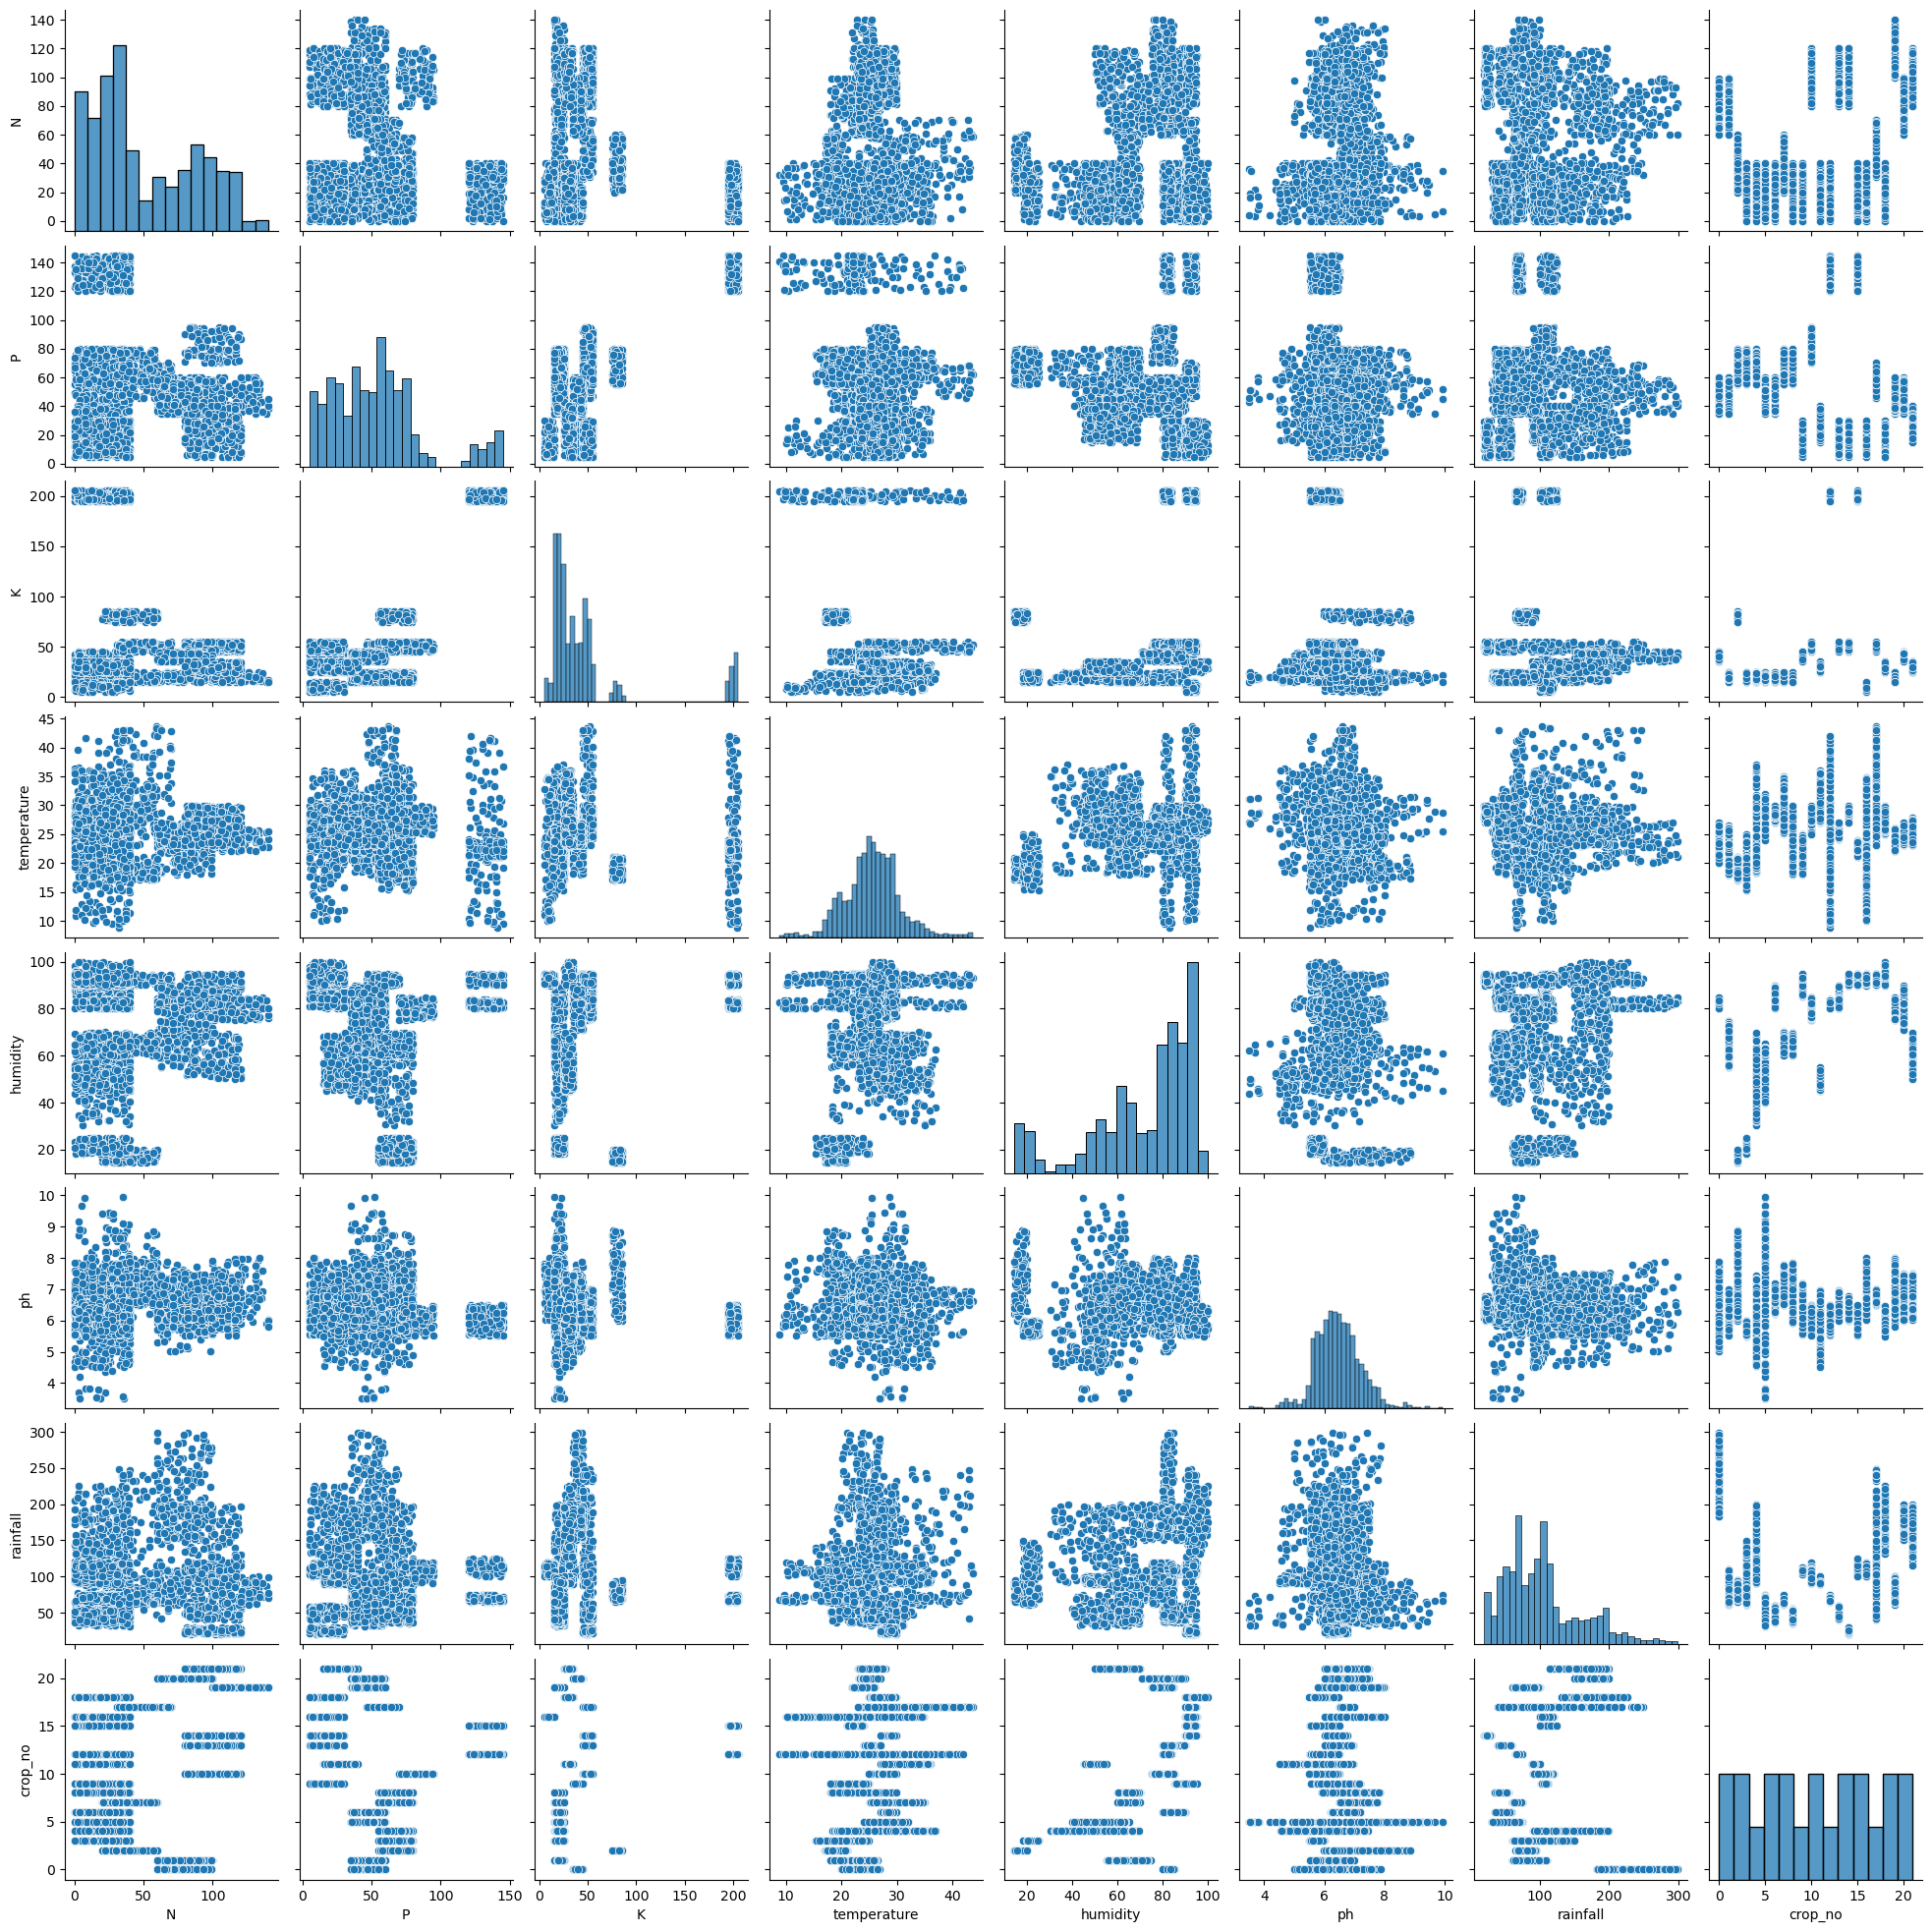

In [69]:
# To  visualize relationships between different numerical features.we may use for selected columns also.

sns.pairplot(crop)
plt.show()

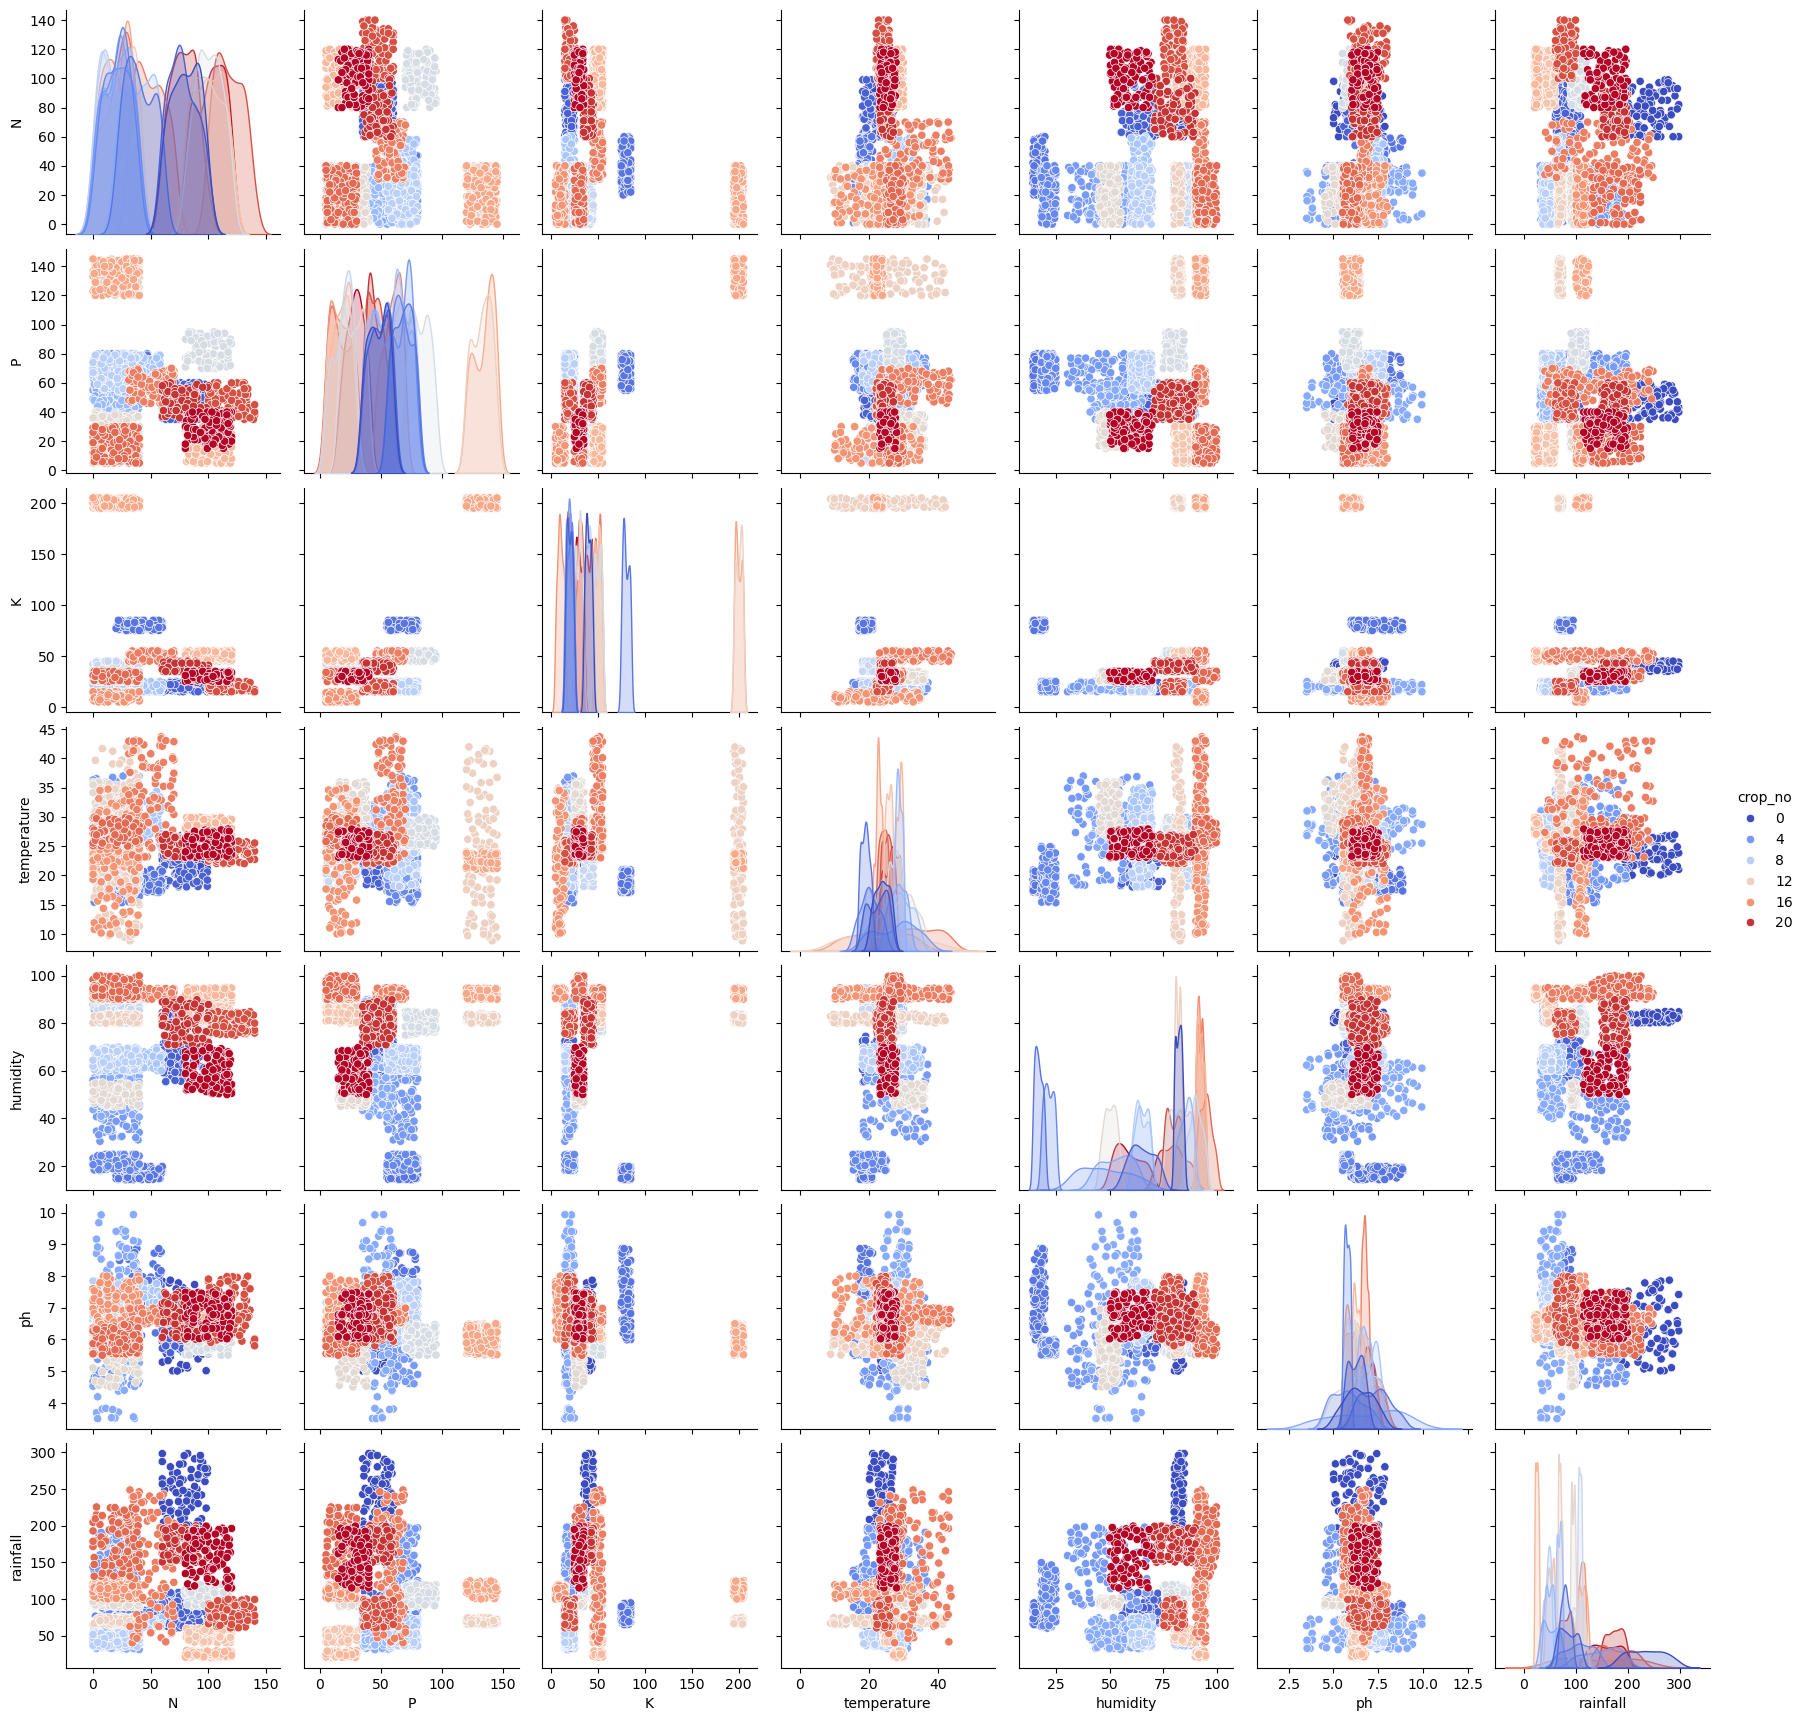

In [70]:
# by using hue and palette we may visualize the relatoins clearly.

sns.pairplot(crop, hue='crop_no', palette='coolwarm', diag_kind='kde')
plt.show()

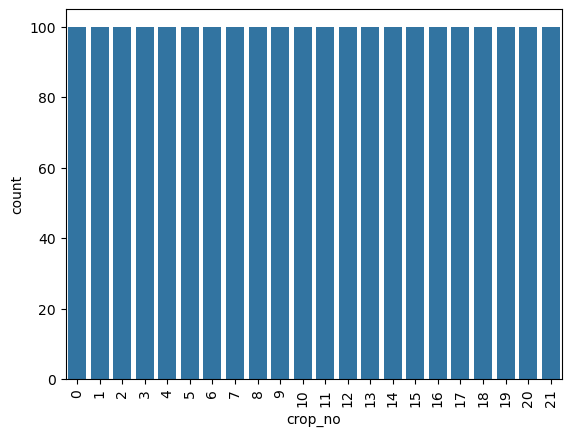

In [71]:
# Countplot for categorical variable (crop_no)-Class Distribution of Crops.

sns.countplot(x=crop['crop_no'])
plt.xticks(rotation=90)
plt.show()

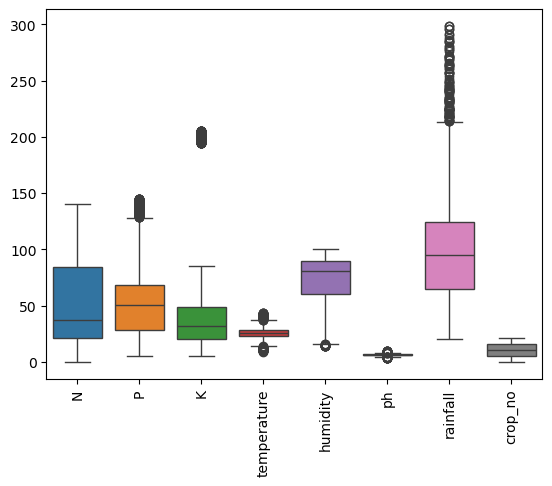

In [72]:
# To check the outliers and what are they in the dataset we use.

sns.boxplot(data=crop)
plt.xticks(rotation=90)
plt.show()

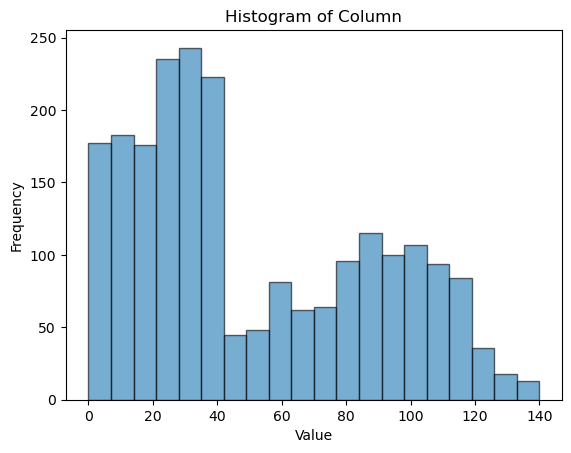

In [73]:
# Histogram of the "N" column from the 'crop' dataset.

plt.hist(crop["N"], bins=20,  edgecolor='black',alpha=0.6) #Replace N with any colunn name.
plt.title("Histogram of Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

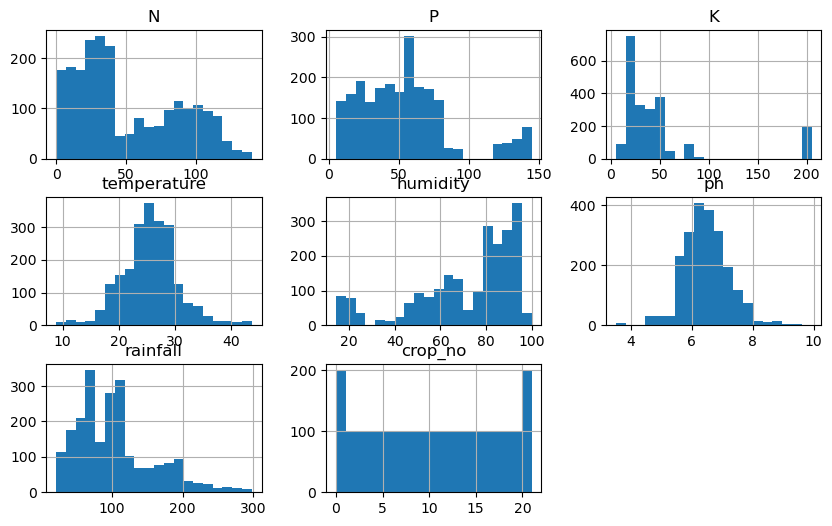

In [74]:
# Generating histograms for all numerical columns in the 'crop' dataset.

import matplotlib.pyplot as plt
crop.hist(figsize=(10, 6), bins=20)
plt.show()

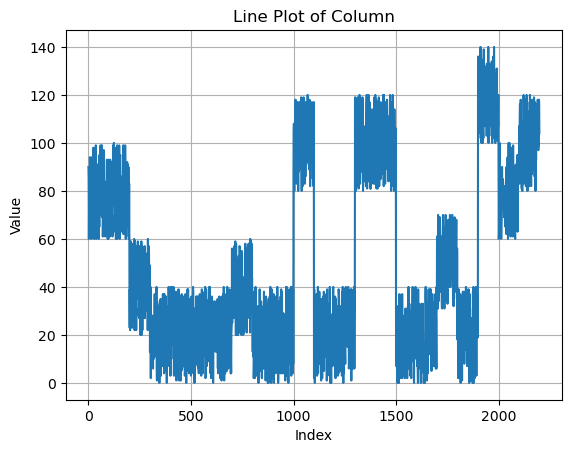

In [75]:
# Line plot for the "N" column in the 'crop' dataset.

plt.plot(crop["N"])  # Replace any column_name from the dataset.
plt.title("Line Plot of Column")
plt.xlabel("Index")
plt.grid(True)  # it displays grid lines.
plt.ylabel("Value")
plt.show()

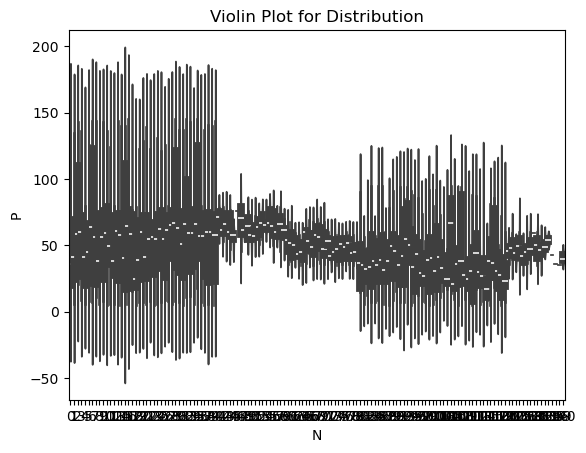

In [76]:
# Violin plot showing the distribution between "N" and "P" columns in the 'crop' dataset.we can use any numerical columns.

sns.violinplot(x=crop['N'], y=crop['P'])
plt.title("Violin Plot for Distribution")
plt.show()

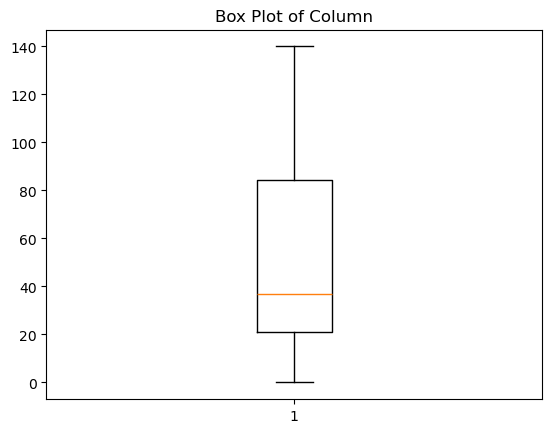

In [77]:
# Box plot for the "N" column in the 'crop' dataset.Replace N with any column_name.

plt.boxplot(crop["N"])
plt.title("Box Plot of Column")
plt.show()

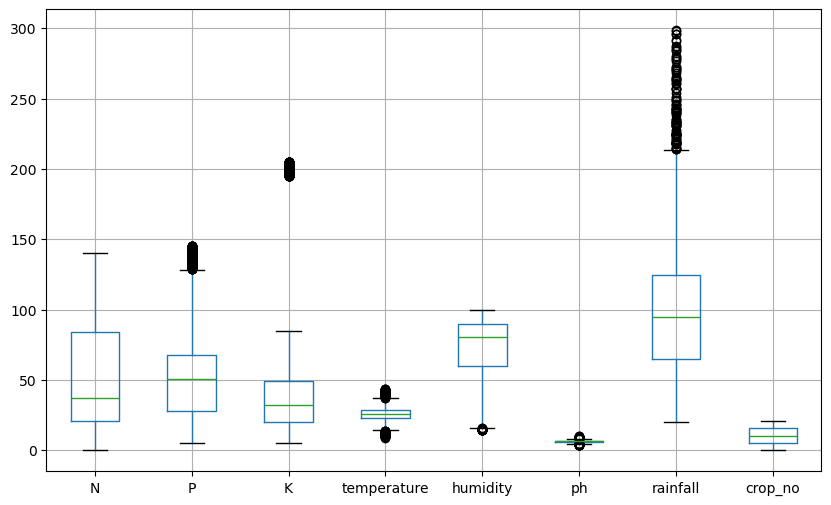

In [78]:
# Box plots for all numerical columns in the 'crop' dataset.

crop.boxplot(figsize=(10, 6))
plt.show()

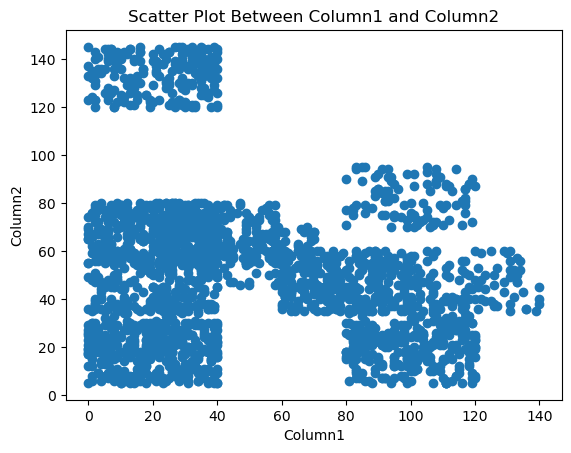

In [79]:
# Scatter plot showing the relationship between "N" and "P" columns in the 'crop' dataset.we can use any numerical column names.

plt.scatter(crop["N"], crop["P"])
plt.title("Scatter Plot Between Column1 and Column2")
plt.xlabel("Column1")
plt.ylabel("Column2")
plt.show()

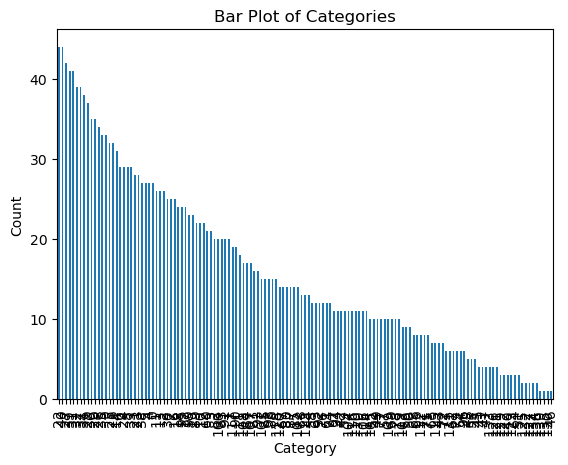

In [80]:
# Bar plot showing the frequency of unique values in the "N" column of the 'crop' dataset.we can use any numerical column.

crop["N"].value_counts().plot(kind='bar')
plt.title("Bar Plot of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

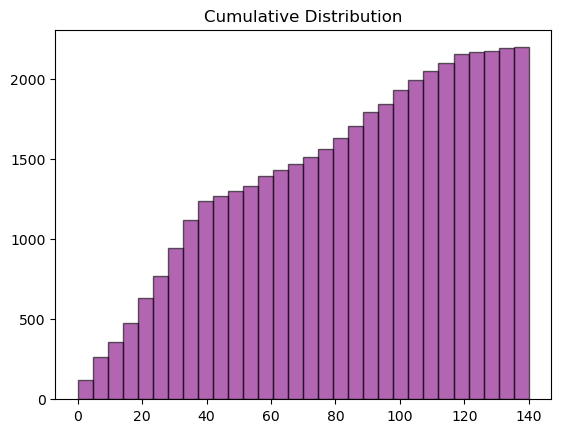

In [81]:
# Cumulative histogram for the "N" column in the 'crop' dataset.we can use any numerical column.

plt.hist(crop['N'], bins=30, cumulative=True, color='purple', edgecolor='black', alpha=0.6)
plt.title("Cumulative Distribution")
plt.show()

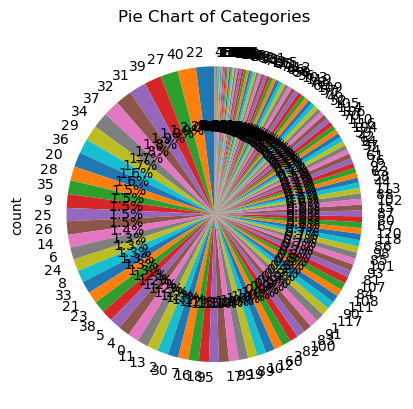

In [82]:
# Pie chart showing the percentage distribution of "N" categories.We can use any numerical column_name.

crop["N"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Categories")
plt.show()

## WEEK-3 PROJECT

In [ ]:
# Train Test Split the data set

X = crop.drop('crop_no' , axis=1) # independent variable
y = crop['crop_no'] # independent variable

In [ ]:
# shape of the independent variable data
X.shape

(2200, 8)

In [ ]:
# shape of y variable 
y.shape

(2200,)

In [84]:
# based on our requirements train data is 80% and test data is 20%
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.shape

(1760, 7)

In [86]:
X_test.shape

(440, 7)

In [87]:
print(y_train.shape)
y_test.shape

(1760,)


(440,)

In [88]:
#Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# Training the model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [90]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [91]:
y_pred = dtc.predict(X_test_scaled)
acs = accuracy_score(y_test, y_pred)
print('Accuracy Score', acs)

Accuracy Score 0.9886363636363636


In [92]:
def crop_rec(N, P, K, temp, hum, ph, rain):
    features = np.array([[N, P, K, temp, hum, ph, rain]])
    transformed_features = scaler.transform(features)
    prediction = dtc.predict(transformed_features).reshape(1,-1)
    crop_dict = {
        0: 'rice',    
        1: 'maize',
        2: 'chickpea',
        3: 'kidneybeans',
        4: 'pigeonpeas',
        5: 'mothbeans',
        6: 'mungbean',
        7: 'blackgram',
        8: 'lentil',
        9: 'pomegranate',
        10: 'banana',
        11: 'mango',
        12: 'grapes',
        13: 'watermelon',
        14: 'muskmelon',
        15: 'apple',
        16: 'orange',
        17: 'papaya',
        18: 'coconut',
        19: 'cotton',
        20: 'jute',
        21: 'coffee'
}
    crop = [crop_dict[i] for i in prediction[0]]

    return f"{crop} is a best crop to grow in the form"

In [93]:
# Predicting with the values

N = 90
P = 45
K = 43
temp = 20
hum = 82
ph = 6.1
rain = 202

crop_rec(N, P, K, temp, hum, ph, rain)

c:\Users\lakna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['rice'] is a best crop to grow in the form"

In [94]:
# Predicting with the values

N = 45
P = 55
K = 55
temp = 26
hum = 83
ph = 8.1
rain = 186

crop_rec(N, P, K, temp, hum, ph, rain)

c:\Users\lakna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['rice'] is a best crop to grow in the form"